In [1]:
import os
from PyPDF2 import PdfFileReader, PdfFileWriter

SPLIT_PAGES = False

if SPLIT_PAGES:
    pdf = PdfFileReader('page_scans/Document.pdf')
    for page in range(pdf.getNumPages()):
        pdf_writer = PdfFileWriter()
        pdf_writer.addPage(pdf.getPage(page))
 
        output_filename = 'page_scans/page_{}.pdf'.format(page)
 
        with open(output_filename, 'wb') as out:
            pdf_writer.write(out)
 
        print('Created: {}'.format(output_filename))
else:
    print('Already Split Pages')

Already Split Pages


### Try One Image

In [2]:
# try one image
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('page_scans/page_0.png')

def thresh_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255,
                           cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    return thresh

thresh = thresh_image(image)

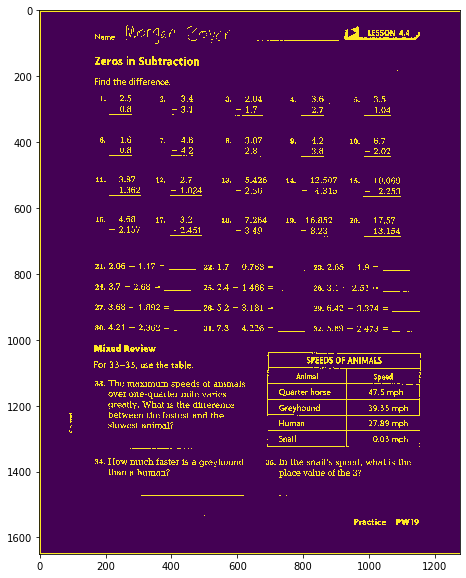

In [3]:
def show_intermediate_result(img):
    plt.figure(figsize = (20,10))
    plt.imshow(img)
    

show_intermediate_result(thresh)

In [4]:
import numpy as np


def find_text_rotation(img):
    # grab the (x, y) coordinates of all pixel values that
    # are greater than zero, then use these coordinates to
    # compute a rotated bounding box that contains all
    # coordinates
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    # the `cv2.minAreaRect` function returns values in the
    # range [-90, 0); as the rectangle rotates clockwise the
    # returned angle trends to 0 -- in this special case we
    # need to add 90 degrees to the angle
    if angle < -45:
        angle = -(90 + angle)

    # otherwise, just take the inverse of the angle to make
    # it positive
    else:
        angle = -angle
    return angle

angle = find_text_rotation(thresh)

In [5]:
# LOL
angle

-0.0

In [6]:
# set angle to see result
angle = -20.0

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center=center, angle=angle, scale=1.0)
    rotated = cv2.warpAffine(src=image,
                             M=M,
                             dsize=(w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    return M, rotated

M, rotated = rotate_image(image=image, angle=angle)

In [7]:
print(type(M))
print(M.shape)
print(M)

<class 'numpy.ndarray'>
(2, 3)
[[   0.93969262   -0.34202014  320.5824188 ]
 [   0.34202014    0.93969262 -168.11324345]]


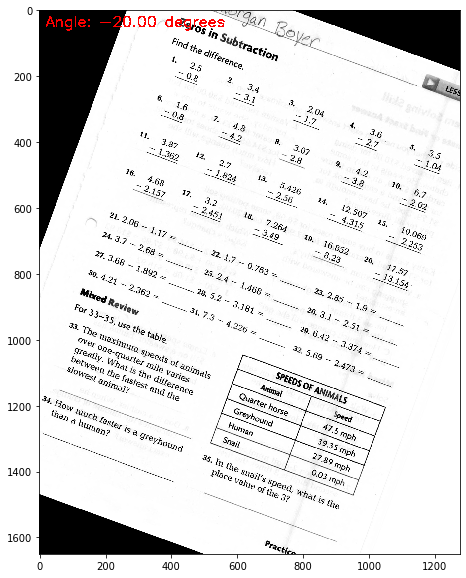

In [8]:
def add_text(image):
    cv2.putText(img=image,
                text="Angle: {:.2f} degrees".format(angle),
                org=(20, 50), # bottom left corner of string
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=1.5,
                color=(255, 0, 0),
                thickness=4)

add_text(rotated)
show_intermediate_result(rotated)

### Check all images for nonzero skew

In [13]:
pths = [f'page_scans/{img_pth}' for img_pth in os.listdir('page_scans') if 'png' in img_pth]

nonzero = []
for pth in pths:
    try:
        image = cv2.imread(pth)
        thresh = thresh_image(image)
        angle = find_text_rotation(thresh)
    except:
        print(f'Error in path {pth}')
        continue
    if angle != 0.0:
        print(pth, angle)
        nonzero.append(pth)

print('Nonzero: ', nonzero)

Nonzero:  []
